# end-to-end machine learning pipeline using a deep learning model (DNN)

## Introduction to the Problem and Dataset
This document outlines a complete machine learning pipeline for image classification using a Deep Neural Network (DNN). We will use the Fashion MNIST dataset, which is a collection of grayscale images of clothing articles. The pipeline will cover data loading, preprocessing, model building, training, validation, and evaluation.

## Loading Libraries
We will use a few essential Python libraries for this project. Each plays a crucial role:

- NumPy: A fundamental library for numerical operations, which we'll use to handle and manipulate our data arrays.

- Matplotlib: A plotting library for visualizing data. We'll use it to display sample images and plot our model's performance.

- Scikit-Learn: A powerful machine learning library for tasks like splitting our dataset and generating evaluation metrics.

- TensorFlow/Keras: The main library for building and training our deep neural network model.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Loading Dataset
The MNIST dataset is a collection of 70,000 grayscale images, each a 28x28 pixel representation of a handwritten digit. The dataset is split into 60,000 training images and 10,000 testing images. Each image is paired with a label indicating the digit it represents (0-9).

In [3]:
# Load the Fashion MNIST dataset directly from Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
# Class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:

# Check the shapes of the loaded data
print(f"Original training data shape: {X_train.shape}")
print(f"Original training labels shape: {y_train.shape}")
print(f"Original test data shape: {X_test.shape}")
print(f"Original test labels shape: {y_test.shape}")

Original training data shape: (60000, 28, 28)
Original training labels shape: (60000,)
Original test data shape: (10000, 28, 28)
Original test labels shape: (10000,)


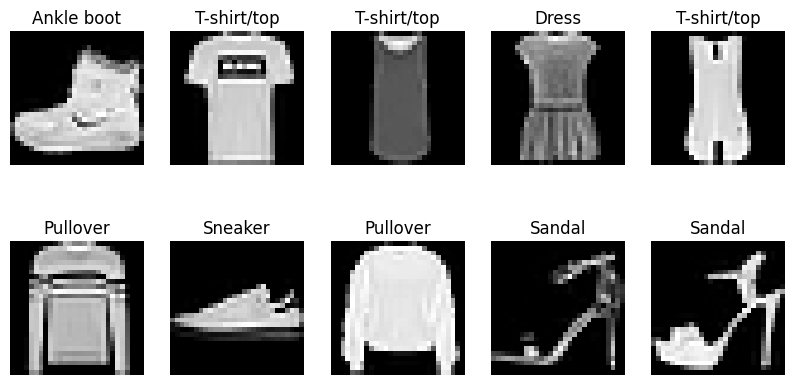

In [7]:
# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [8]:

# Display class distribution
unique, counts = np.unique(y_train, return_counts=True)
print("\nTraining set class distribution:")
for i, (label, count) in enumerate(zip(unique, counts)):
    print(f"{class_names[i]} ({label}): {count} samples")



Training set class distribution:
T-shirt/top (0): 6000 samples
Trouser (1): 6000 samples
Pullover (2): 6000 samples
Dress (3): 6000 samples
Coat (4): 6000 samples
Sandal (5): 6000 samples
Shirt (6): 6000 samples
Sneaker (7): 6000 samples
Bag (8): 6000 samples
Ankle boot (9): 6000 samples


## Preprocessing
Data preprocessing is a crucial step before feeding the data into a neural network.

- Normalization: The pixel values of the images are integers between 0 and 255. We scale these values down to a float range of 0 to 1 by dividing by 255. This helps the model train more efficiently and is a standard practice for neural networks.

- Flattening: A DNN requires a 1D vector as input for each sample. Our images are 2D (28x28 pixels). We use Keras's Flatten layer to automatically transform the 28x28 images into a 784-element vector, one for each pixel.

In [ ]:
# Normalize the pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(f"\nNormalized training data shape: {X_train.shape}")
print(f"Normalized test data shape: {X_test.shape}")


Normalized training data shape: (60000, 28, 28)
Normalized test data shape: (10000, 28, 28)


## Feature Engineering

For a Deep Neural Network, feature engineering is often handled automatically by the network itself. Unlike traditional machine learning models where you might manually extract features (e.g., color histograms, edge detectors), the hidden layers of a DNN learn to identify and extract the most relevant features directly from the raw pixel data. The model determines which combinations of pixels are important for classifying different fashion items. Therefore, no manual feature engineering is necessary in this pipeline.

## Feature Engineering

While the dataset is already split into training and test sets, it's a best practice to create a separate validation set from the training data.

- Training Set: Used to train the model and adjust its internal parameters (weights and biases).

- Validation Set: Used during the training process to tune hyperparameters (like the number of layers or neurons) and monitor for overfitting. The model never sees the validation data during the weight-adjustment phase of training.

- Test Set: Used only after training is complete to provide an unbiased evaluation of the final model's performance on completely new data.

In [10]:
# Split the training data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f"\nFinal training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Final training data shape: (54000, 28, 28)
Validation data shape: (6000, 28, 28)


## Model Training and Hyperparameter Tuning
 ### Hyperparameter: 

- Architecture: We are making the model more complex by increasing the number of hidden layers and the number of neurons in each layer. A deeper and wider network has more capacity to learn from the data.

- Activation Function: The function that introduces non-linearity into the model. The relu (Rectified Linear Unit) activation is a common choice for hidden layers because it's computationally efficient. The final softmax activation is used for multi-class classification, converting the output into a probability distribution.

- Dropout Rate: The fraction of neurons to randomly drop out during training. This is a powerful regularization technique to prevent overfitting. A dropout rate of 0.2 means 20% of the neurons are randomly ignored at each training step.

- Optimizer: The algorithm used to update the model's weights based on the training data. The adam optimizer is a popular and effective choice that adapts the learning rate for each parameter.

- Loss Function: The function that measures how well the model is performing. sparse_categorical_crossentropy is used here because our labels are integers and we have multiple classes.

- Epochs: The number of times the model will iterate over the entire training dataset. We use EarlyStopping to stop training before the full number of epochs if performance on the validation set plateaus, which prevents overfitting and saves computation.

- Patience: The number of epochs with no improvement after which training will be stopped. In this pipeline, the EarlyStopping callback has a patience of 5, meaning training will stop if the validation loss doesn't improve for 5 consecutive epochs.


 ### The Deep Neural Network (DNN) Model

A DNN is a neural network with multiple hidden layers between the input and output layers. In this pipeline, the model consists of:

- Flatten Layer: This layer transforms the 2D image data into a 1D array.

- Dense Layers: These are the core of the DNN. Every neuron in a dense layer is connected to every neuron in the previous layer. We'll use relu as the activation function, which helps the model learn complex, non-linear relationships.

- Dropout Layer: This layer randomly "drops out" a fraction of the neurons during training. This prevents co-adaptation of neurons and acts as a powerful regularization technique to prevent overfitting.

- Output Layer: The final dense layer has 10 neurons, one for each class. We use the softmax activation function, which outputs a probability distribution over the 10 classes, allowing us to determine the most likely class.

 ### Building the Model

We will build a simple but effective DNN using Keras's Sequential API. We'll also use EarlyStopping to automatically stop training if the validation loss doesn't improve after a certain number of epochs, which saves time and prevents overfitting.

In [20]:
# Define the DNN model architecture
model = Sequential([
    # Input layer and first hidden layer
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),

    # Second hidden layer with Dropout for regularization
    Dense(128, activation='relu'),
    Dropout(0.2),

    # Third hidden layer
    Dense(64, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the validation set and early stopping
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7594 - loss: 0.6846 - val_accuracy: 0.8482 - val_loss: 0.4235
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8558 - loss: 0.3976 - val_accuracy: 0.8505 - val_loss: 0.4009
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8737 - loss: 0.3498 - val_accuracy: 0.8638 - val_loss: 0.3765
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8780 - loss: 0.3320 - val_accuracy: 0.8730 - val_loss: 0.3677
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8846 - loss: 0.3094 - val_accuracy: 0.8840 - val_loss: 0.3344
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8945 - loss: 0.2877 - val_accuracy: 0.8818 - val_loss: 0.3263
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8948 - loss: 0.2822 - val_accuracy: 0.8845 - val_loss: 0.3288
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8994 - loss: 0.2647 - 

## Testing the Model

After training, we use the held-out test set to evaluate the final model's performance on data it has never seen. This gives us an unbiased measure of its generalization capabilities.

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8780 - loss: 0.3382

Test accuracy: 0.8780
Test loss: 0.3382


## Metrics Evaluation

Beyond just accuracy, we need to look at other metrics to get a complete picture of the model's performance.

- Precision: The ratio of correctly predicted positive observations to the total predicted positive observations.

- Recall: The ratio of correctly predicted positive observations to all observations in the actual class.

- F1-Score: The weighted average of Precision and Recall.

- Confusion Matrix: A table that visualizes the performance of an algorithm. Each row represents the instances in an actual class, while each column represents the instances in a predicted class.

In [22]:
# Get predictions for the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.85      0.71      0.78      1000
       Dress       0.86      0.89      0.88      1000
        Coat       0.76      0.85      0.80      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.68      0.70      0.69      1000
     Sneaker       0.90      0.98      0.94      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
[[829   3   7  42   7   1 104   0   7   0]
 [  1 969   0  21   3   0   4   0   2   0]
 [  9   1 715  13 138   0 124   0   0   0]
 [ 20  10   5 890  47   0  22

## Visualization

Visualizing the training process helps us understand if the model is learning effectively and if it's overfitting. We plot the training and validation accuracy and loss over the epochs.

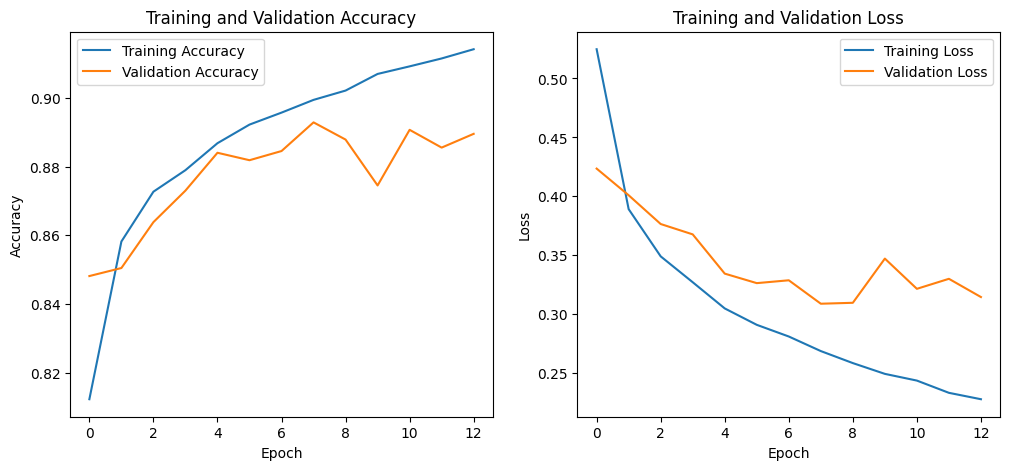

In [23]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Conclusion

This run with a more complex Deep Neural Network (DNN) architecture shows a very similar overall accuracy of 88% . The model continues to perform exceptionally well on items with distinct shapes like Trouser, Bag, and Sneaker, each with an F1-score of 0.94 or higher.

The model struggles with classes that are visually similar. The Shirts, Pullovers, and Coats categories have the lowest F1-scores and are frequently confused with each other. For example, the confusion matrix shows that the model misclassified a significant number of Pullovers as Coats (138 times) and Shirts (124 times). Similarly, a large number of Coats were misclassified as Pullovers (57 times) and Shirts (70 times). This suggests that the model's complexity is still not enough to reliably distinguish between these similar items.